In [53]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from scipy import stats

# Problem 1

> The following data indicate the relationship between x, the speciﬁc gravity of
a wood sample, and Y , its maximum crushing strength in compression parallel to
the grain.
> 1. Plot a scatter diagram. Does the linear relationship seem reasonable
> 2. Estimate the regression coefficients
> 3. Predict the maximum crushing strength of a wood sample whose specific gravity is $0.43$


In [25]:
x_i = np.array([0.41,  0.46,  0.44,  0.47,  0.42,  0.39,  0.41,  0.44,  0.43,  0.44])
y_i = np.array([1.850, 2.620, 2.340, 2.690, 2.160, 1.760, 2.500, 2.750, 2.730, 3.120])
x_mean = np.mean(x_i)
y_mean = np.mean(y_i)

t = np.linspace(np.min(x_i), np.max(x_i))

n = len(x_i)

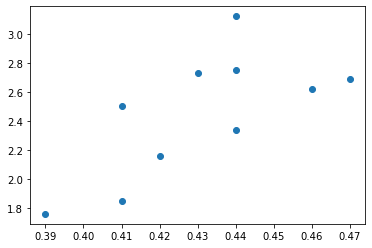

In [7]:
# Part A
plt.scatter(x_i, y_i)

A: -2.8259168241966486, B: 12.245746691871574


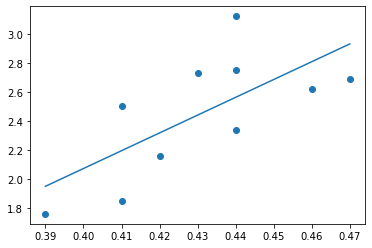

In [28]:
# Part B

S_xY = sum((x * y for (x, y) in zip(x_i, y_i))) - n * x_mean * y_mean
S_xx = sum((x * x for x in x_i)) - n * x_mean * x_mean

B = S_xY / S_xx
A = y_mean - B * x_mean
print(f"A: {A}, B: {B}")

plt.scatter(x_i, y_i)
plt.plot(t, B * t + A)

In [33]:
# Part C
where = 0.43
print(f"No 'a' percentage is given, so we just fint the regression value at {where}")

print(f"The predicted maximum strength is {B * where + A}")

# TODO TODO GET HELP
print("Wait this makes no sense, 0.43 is in the sample set.b")

No 'a' percentage is given, so we just fint the regression value at 0.43
The predicted maximum strength is 2.4397542533081285
Wait this makes no sense, 0.43 is in the sample set.b


# Problem 2

This seemes like a continuation.

> In Problem 4.
> 1. Estimate the variance of an individual response.



In [41]:
S_YY = sum((y*y for y in y_i)) - n * y_mean * y_mean
SS_R = (S_xx * S_YY - (S_xY)**2) / S_xx
sigma2 = SS_R / (n - 2)
print(f"The estimated variance is {sigma2}")

The estimated variance is 0.10566006616257498


# Problem 3

> The following data set presents the heights of 12 male law school classmates whose
law school examination scores were roughly equal. It also gives their annual salaries
5 years after graduation. Each of them went into corporate law. The height is in
inches and the salary in units of $1,000.
> 1. Do the above data establish the hypothesis that a lawyer’s salary is related to
his height? Use the 5 percent level of signiﬁcance.
> 2. What was the null hypothesis in part (a)?


## Part A

We let the null hypothesis be that there is no relation between the salary and height, thus that $\beta = 0$.

In [45]:
x_i = np.array([64, 65, 66, 67, 69, 70, 72, 72, 74, 74, 75, 76])
y_i = np.array([91, 94, 88, 103, 77, 96, 105, 88, 122, 102, 90, 114])

alpha = 0.05

n = len(x_i)

x_mean = np.mean(x_i)
y_mean = np.mean(y_i)

In [56]:
# Part A
S_xx = sum((x * x for x in x_i)) - n * x_mean**2
S_YY = sum((y * y for y in y_i)) - n * y_mean**2
S_xY = sum((x * y for (x, y) in zip(x_i, y_i))) - n * x_mean * y_mean
SS_R = (S_xx * S_YY - (S_xY)**2) / S_xx

print(f"B: {(B := S_xY / S_xx)}")
TS = np.sqrt(((n - 2) * S_xx) / SS_R) * np.abs(B)
print(f"TS: {TS}")

p_value = 2 * (1 - stats.t.cdf(TS, n-2))
print(f"p_value: {p_value}")
if p_value < alpha:
    print("h_0 is rejected and there is a connection between salary and height. Why tho")
else:
    print("h_0 is accepted and thus there is no connection, which kind of makes sense.") 

B: 1.4571428571428193
TS: 1.7483281067751004
p_value: 0.11098065306186689
h_0 is accepted and thus there is no connection, which kind of makes sense.
